# Tarea 4: Pruebas de hipótesis

Solución de los ejercicios de la sección `Pruebas de hipótesis` del libro del curos [Fundamentos Estadísticos](https://tereom.github.io/fundamentos-2022/pruebas-de-hip%C3%B3tesis.html)

# Pruebas visuales y permutación

## Pruebas de permutación
La tabla de datos `Phillies2009.csv`  contiene información de la temporada de baseball 2009 para el equipo de Philadelphia Phillies, en este ejercicio queremos comparar los strikes (`StrikeOuts`) entre los juegos en casa y de visitante.

### Carga de datos

In [1]:
import os
import numpy as np
import pandas as pd
import numpy as plt
import matplotlib.pyplot as plt

from utils import ordenar_tendencia_central, tabla_prueba_permutacion

In [2]:
path_universal = "C:\\Users\\Miguel\\Documents\\Github\\itam-mcd"
os.listdir(path_universal)

['.git',
 'aprendizaje-automatico',
 'estadistica-computacional',
 'fundamentos-estadisticos',
 'mineria-analisis-datos',
 'optimizacion',
 'README.md']

In [3]:
path_asignatura = "fundamentos-estadisticos"
path_asignatura = os.path.join(path_universal, path_asignatura)
os.listdir(path_asignatura)

['datos', 'libros']

In [4]:
#Se obtiene dataset original
file_path = "datos\\Phillies2009.csv"
phillies = pd.read_csv(os.path.join(path_asignatura, file_path))
phillies.head()

,Date,Location,Outcome,Hits,Doubles,HomeRuns,StrikeOuts
0,5-Apr,Home,Lose,4,2,0,6
1,7-Apr,Home,Lose,6,1,0,3
2,8-Apr,Home,Win,11,3,1,6
3,10-Apr,Away,Lose,7,2,1,3
4,11-Apr,Away,Win,15,3,1,6


In [5]:
print(f"Dimensiones del conjunto de datos: {phillies.shape}")

Dimensiones del conjunto de datos: (162, 7)


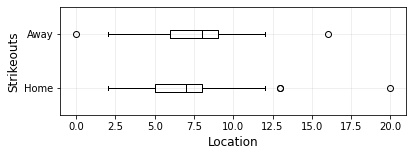

In [6]:
#Se ordena el dataset con respecto a la mediana
ordenar_tendencia_central(phillies, 'Location', 'StrikeOuts', mo='median')

#Graficamos todo el conjunto de datos
ax = phillies.boxplot(by='Location', column='StrikeOuts', figsize=(6,2), vert=False, color='black')
ax.set_title('')
ax.set_xlabel("Location", fontsize=12)
ax.set_ylabel("Strikeouts", fontsize=12)
ax.grid(alpha=0.25)

plt.suptitle('')
plt.show()

### Ejercicio 1
Realiza un lineup donde cada panel muestre un diagrama de caja y brazos para la variable de interés separando los juegos jugados en casa (`home`) y los juegos jugados fuera (`away`). ¿Puedes localizar los datos verdaderos entre los nulos?

In [7]:
agrupadora = 'Location'
permutadora = 'StrikeOuts'

perm_df = tabla_prueba_permutacion(phillies, agrupadora, permutadora)
perm_df

,Location,0,7,14,15,16,10,8,18,17,...,3,13,2,6,12,9,StrikeOuts,1,5,11
0,Home,4,8,9,9,7,6,5,12,7,...,6,8,5,12,7,5,6,8,8,10
1,Home,7,3,10,8,9,5,3,8,9,...,6,4,7,4,6,2,3,13,4,6
2,Home,6,6,6,4,12,8,7,10,6,...,5,3,7,5,11,9,6,9,6,9
3,Away,11,8,20,8,5,8,7,5,12,...,8,4,8,9,9,6,3,6,5,4
4,Away,9,7,12,3,8,8,7,6,2,...,8,8,5,8,5,7,6,5,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Home,9,9,12,4,5,4,6,9,5,...,5,8,7,16,7,4,2,7,8,7
158,Home,9,2,7,6,6,3,8,8,5,...,6,6,8,6,5,5,8,7,6,8
159,Home,5,10,8,6,5,12,7,6,6,...,12,6,10,4,5,6,4,8,5,20
160,Home,13,20,2,11,5,8,6,7,9,...,12,10,9,9,9,9,4,7,8,5


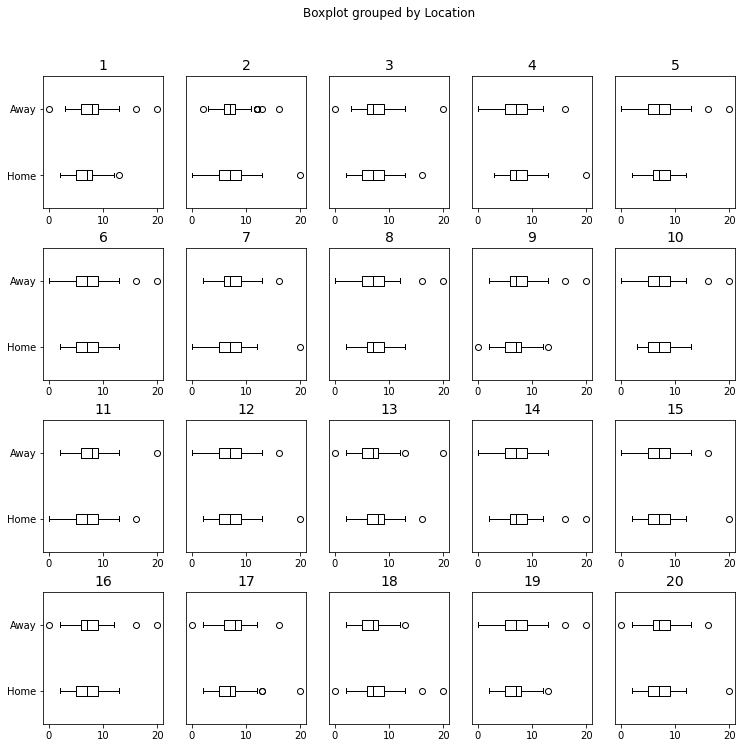

In [8]:
fig = plt.figure(figsize=(12,12))
spec = plt.GridSpec(ncols=5, nrows=4, hspace=0.3)

#Paneles
for i in np.arange(1,21):
    ax_n = f"ax{i}"
    ax_n = fig.add_subplot(spec[i-1])
    perm_df.boxplot(by=agrupadora, column=perm_df.columns[i], vert=False, color='black', ax=ax_n)
    ax_n.set_title(i, fontsize=14)
    ax_n.set_xlabel('')
    ax_n.grid(False)
    
    if (i-1)%5 != 0:
        ax_n.set_yticks([])

plt.show()